In [1]:
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

In [3]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("winter",lut=10)
spec = cm.get_cmap("Purples",lut =22)
reds = cm.get_cmap("Reds",lut =22)
Orag = cm.get_cmap("Set1",lut =5)
spri = cm.get_cmap("viridis",lut =5)

c_blues = [blues(i) for i in range(10)]
c_spec = [spec(i) for i in range(22)]
c_rs = [reds(i) for i in range(22)]
c_os = [Orag(i) for i in range(5)]
c_spri = [spri(i) for i in range(5)]

/tmp/ipykernel_324643/2672977788.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap("winter",lut=10)
/tmp/ipykernel_324643/2672977788.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  spec = cm.get_cmap("Purples",lut =22)
/tmp/ipykernel_324643/2672977788.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = cm.get_cmap("Reds",lut =22)
/tmp/ipykernel_324643/2672977788.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprec

In [52]:
gam = np.linspace(0,10,101)
lowgam = np.linspace(0,3,101)

In [53]:
test_Ma = np.zeros(len(gam))
test_Mb = np.zeros(len(gam))


for i in range(len(gam)):
    test_Ma[i] = sp.mathieu_a(0,gam[i])
    test_Mb[i] = sp.mathieu_b(1,gam[i])

In [54]:
test_lMa = np.zeros(len(lowgam))
test_lMb = np.zeros(len(lowgam))


for i in range(len(lowgam)):
    test_lMa[i] = sp.mathieu_a(0,lowgam[i])
    test_lMb[i] = sp.mathieu_b(1,lowgam[i])

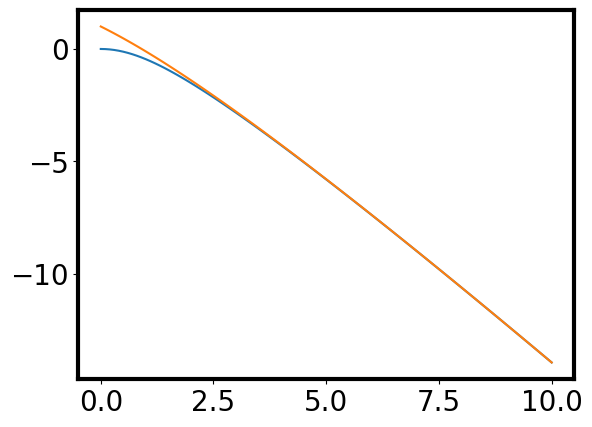

In [55]:
plt.plot(gam,test_Ma)
plt.plot(gam,test_Mb)

Low Gamma Comparision

In [56]:
a0 = lambda g: -(1/2)*g**2 + (7/128)*g**4 - (29/2304)*g**6 + (68687/18874368)*g**8
b1 = lambda g: 1 - g - (1/8)*g**2 +(1/64)*g**3 - (1/1536)*g**4 - (11/36864)*g**5 + (49/589824)*g**6 - (55/9437184)*g**7 - (265/113246208)*g**8

In [57]:
Comp_a0 = np.zeros(len(lowgam))
Comp_b1 = np.zeros(len(lowgam))

for i in range(len(lowgam)):
    Comp_a0[i] = a0(lowgam[i])
    Comp_b1[i] = b1(lowgam[i])

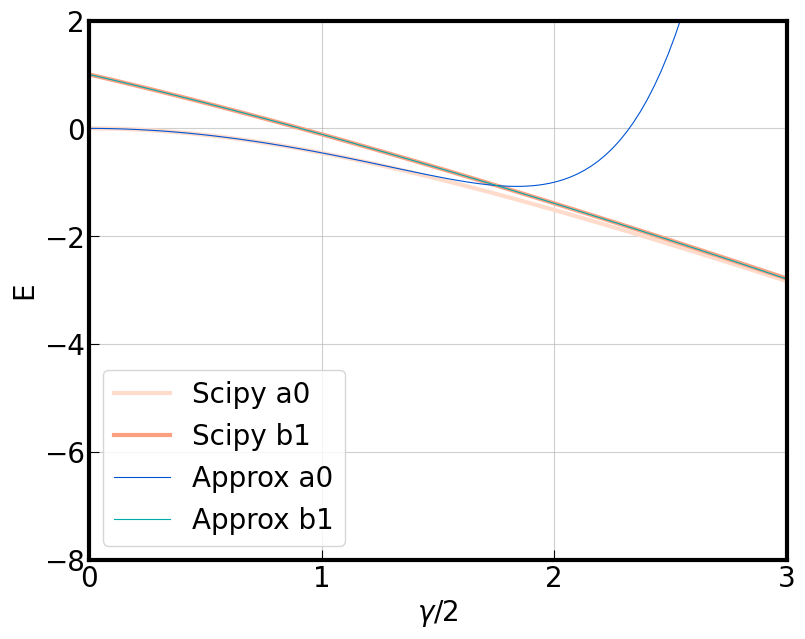

In [59]:
fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 20})

plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)

plt.xticks(np.linspace(0,6,7))
plt.yticks(np.linspace(-14,2,9))

plt.xlim([0,3])
plt.ylim([-8,2])

plt.grid(alpha=0.6)

plt.xlabel(r'$\gamma$/2')
plt.ylabel(r'E')

plt.plot(lowgam,test_lMa, color = c_rs[3],linewidth=3,label = 'Scipy a0')
plt.plot(lowgam,test_lMb, color = c_rs[7],linewidth=3,label = 'Scipy b1')

plt.plot(lowgam,Comp_a0, color = c_blues[3], linewidth = 0.8, label = 'Approx a0')
plt.plot(lowgam,Comp_b1, color = c_blues[6], linewidth = 0.8, label = 'Approx b1')

plt.legend()

plt.savefig("/home/way_ern/Programs/Plt_img/20241209_Mathieu/Approx_lowgam_under2.pdf",format='pdf',bbox_inches='tight')

High Gamma Comparision

In [7]:
ha0 = lambda g: 2*np.sqrt(g) - 2*g
hb1 = lambda g: 16*np.sqrt(2/np.pi)*g**(0.75) * np.exp(-4*np.sqrt(g)) + 2*np.sqrt(g) - 2*g

In [14]:
Comp_ha0 = np.zeros(len(gam))
Comp_hb1 = np.zeros(len(gam))

for i in range(len(gam)):
    Comp_ha0[i] = ha0(gam[i])
    Comp_hb1[i] = hb1(gam[i])

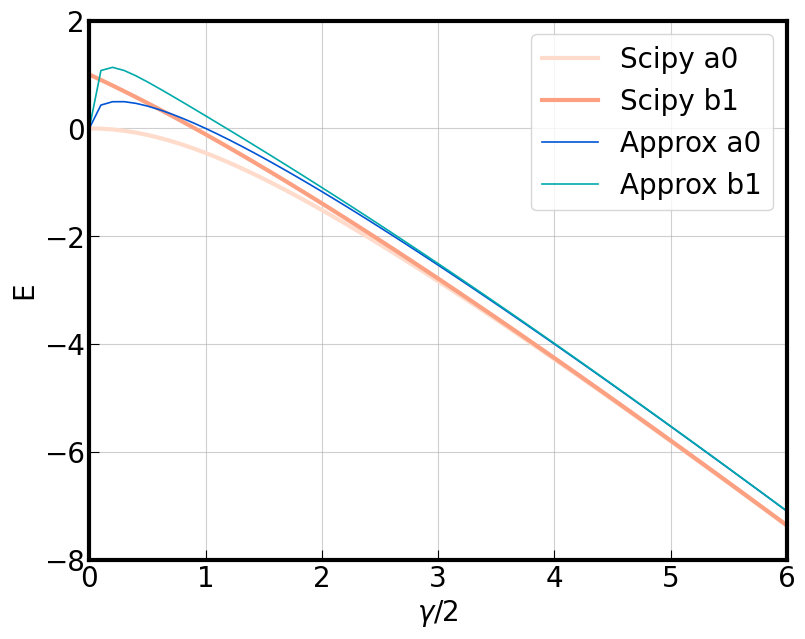

In [40]:
fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 20})

plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)

plt.xticks(np.linspace(0,6,7))
plt.yticks(np.linspace(-14,2,9))

plt.xlim([0,6])
plt.ylim([-8,2])

plt.grid(alpha=0.6)

plt.xlabel(r'$\gamma$/2')
plt.ylabel(r'E')

plt.plot(gam,test_Ma, color = c_rs[3],linewidth=3,label = 'Scipy a0')
plt.plot(gam,test_Mb, color = c_rs[7],linewidth=3,label = 'Scipy b1')

plt.plot(gam,Comp_ha0, color = c_blues[3], linewidth = 1.2, label = 'Approx a0')
plt.plot(gam,Comp_hb1, color = c_blues[6], linewidth = 1.2, label = 'Approx b1')

plt.legend()

plt.savefig("/home/way_ern/Programs/Plt_img/20241209_Mathieu/Approx_gam_over2.pdf",format='pdf',bbox_inches='tight')